# **Why use aes_string(), not aes(), when looping thru conditions**

In ggplot2, the aes() function is used to map variables in your data to visual properties (aesthetics) of the plot. You typically use it with unquoted variable names, like this: aes(x = var1, y = var2).

However, in the loop example I provided, we’re dealing with variable names stored as strings in the x_vars vector. When you’re using a string to specify a variable name, you need to use aes_string() instead of aes(). This is because aes() evaluates its arguments in a non-standard way (it’s looking for actual variables in your data, not strings).

So, in the loop, when we do aes_string(x = x_var, y = "sat", color = "group"), it’s equivalent to doing something like aes(x = test1, y = sat, color = group) if x_var is "test1".

In short, use aes() when you have unquoted variable names and aes_string() when you have variable names stored as strings. 😊

In [104]:
#Chat

test1 <- c(0.5,-4.6,-3.7,-2.4,-2.8,-0.6,-2.3,-1.1,-2.3)
test2 <- c(16.6,15.8,14.5,15.7,13.6,13.7,17.1,16.2,14.3)
sat <- c(25,20,6,15,13,9,5,22,21)
group <-c("A","A","B","B","B","A","A","B","A")
df <- data.frame(group, sat, test1,test2)



# Move multiple files into one folder

In [122]:
# Load required package
library(tools)

# Specify the source and destination directories
source_dir <- "C:/Users/truev/Documents/UCSC/BaysianStatistics/02_Techniques/Week5"
#dest_dir <- "C:/Users/truev/Documents/UCSC/BaysianStatistics/02_Techniques/Week5/plots/violinplot"
dest_dir <- "C:/Users/truev/Documents/UCSC/BaysianStatistics/02_Techniques/Week5/plots/scatterplot"

# Get a list of all .png files in the source directory
#files <- list.files(path = source_dir, pattern = "\\.png|jpg$")
files <- list.files(path = source_dir, pattern = "\\.png$")

# Move each .png file to the destination directory
for (file in files) {
  file.rename(from = file.path(source_dir, file), 
              to = file.path(dest_dir, file))
}


# **Introduction**
# Beginning from a dataset...

In [105]:
#"weo_092023" is obsolete/modified at data wrangling stage
df <- read.csv("weo_092423.csv")
summary(df)
nrow(df)

    Region               Year           ACCT                GDP         
 Length:343         Min.   :1980   Min.   :-10.90000   Min.   :  848.1  
 Class :character   1st Qu.:1992   1st Qu.: -2.10000   1st Qu.: 3698.0  
 Mode  :character   Median :2004   Median : -0.60000   Median :10072.1  
                    Mean   :2004   Mean   :  0.02239   Mean   :16704.4  
                    3rd Qu.:2016   3rd Qu.:  1.17500   3rd Qu.:27285.3  
                    Max.   :2028   Max.   : 18.30000   Max.   :70230.0  
                                   NA's   :17          NA's   :13       
      GGD              INF              PPL         
 Min.   : 21.30   Min.   : -0.10   Min.   :  70.96  
 1st Qu.: 53.02   1st Qu.:  3.25   1st Qu.: 434.80  
 Median : 69.70   Median :  6.10   Median : 640.73  
 Mean   : 72.91   Mean   : 15.02   Mean   :1007.84  
 3rd Qu.: 91.08   3rd Qu.:  9.90   3rd Qu.: 770.61  
 Max.   :140.40   Max.   :475.90   Max.   :4546.85  
 NA's   :137                                 

[1] 343

In [106]:
library(dplyr)
df_select <- df %>% 
            filter(Year %in% 2000:2022) 
nrow(df_select)
#head(df_select,7)
#tail(df_select,7)             

[1] 161

In [107]:
#EXECUTE EACH TIME !!!

# Modify Region values as they are too long/crowded in the graph
# Assuming 'df' is your data frame and 'Region' is the column you want to modify

df_select$Region <- gsub("Asia and Pacific", "APAC", df_select$Region)
df_select$Region <- gsub("Latin America and the Caribbean", "LATAM", df_select$Region)
df_select$Region <- gsub("Major advanced economies \\(G7\\)", "G7", df_select$Region)
df_select$Region <- gsub("North America", "NAM", df_select$Region)
df_select$Region <- gsub("Middle East", "ME", df_select$Region)
colnames(df_select)

[1] "Region" "Year"   "ACCT"   "GDP"    "GGD"    "INF"    "PPL"

# **Boxplot**

In [3]:
#https://r-graph-gallery.com/89-box-and-scatter-plot-with-ggplot2.html

# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)

# Define the variables for which you want to create plots
variables <- c("GDP", "INF", "PPL", "ACCT", "GGD")

variables_ylab <- c("Gross Domestic Product \n (US dollars per capita)", 
                    "Inflation \n (annual % change)", 
                    "Population \n (millions of people)",
                    "Current Account Balance \n (% of GDP)",
                    "General Government Gross Debt \n (% of GDP)")

variables_title <- c("Gross Domestic Product \n (US dollars per capita)",
                     "Inflation \n (annual % change)",
                     "Populaton \n (in millions)",
                     "Current Account Balance \n (% of GDP)",
                     "General Government Gross Debt \n (% of GDP)")  # Add this line

# Initialize an empty list to store the plots
plot_list <- list()

# Use a loop to create a plot for each variable
for (i in seq_along(variables)) {
  # Create the plot
  p <- ggplot(df_select, aes_string(x="Region", y=variables[i], fill="Region")) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    theme_ipsum() +
    theme(
      legend.position="right",
      legend.title = element_text(face = "bold"),  # Bold the legend title
      legend.text = element_text(face = "bold"),  # Bold the legend text
      plot.title = element_text(hjust = 0.5, vjust=3),
      axis.title.x = element_text(hjust=0.5, vjust=-7,color = "blue", size = 14, face = "bold"), 
      axis.title.y = element_text(hjust=0.5, vjust=10, color = "blue", size = 14, face = "bold"),
      axis.text = element_text(face = "bold"),
      plot.background = element_rect(fill = "white"), # Set background color to white
      panel.background = element_rect(fill = "white") # Set panel background color to white
    ) +
    labs(fill = "Region + G7") +  # Customize the legend title
    ggtitle(variables_title[i]) +  # Use the title from variables_title vector
    xlab("Region + G7")+
    ylab(variables_ylab[i])  # Add y-axis label
  
  # Print the plot
  #print(p)

  # Save the plot with file name as variable name
  ggsave(paste0(variables[i], "_boxplot.png"), plot = p)
}

dev.off()



── Attaching core tidyverse packages ───────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.3     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ─────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


null device 
          1

# **Violin Plot**

In [91]:
#https://r-graph-gallery.com/89-box-and-scatter-plot-with-ggplot2.html

# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)

# Define the variables for which you want to create plots
variables <- c("GDP", "INF", "PPL", "ACCT", "GGD")
variables_ylab <- c("Gross Domestic Product \n (US dollars per capita)", 
                    "Inflation \n (annual % change)", 
                    "Population \n (millions of people)",
                    "Current Account Balance \n (% of GDP)",
                    "General Government Gross Debt \n (% of GDP)")

variables_title <- c("Gross Domestic Product \n (US dollars per capita)",
                     "Inflation \n (annual % change)",
                     "Populaton \n (in millions)",
                     "Current Account Balance \n (% of GDP)",
                     "General Government Gross Debt \n (% of GDP)")  # Add this line

# Initialize an empty list to store the plots
plot_list <- list()

# Use a loop to create a plot for each variable
for (i in seq_along(variables)) {    
  # Create the plot
  p <- ggplot(df_select, aes_string(x="Region", y=variables[i], fill="Region")) +
    geom_violin(width=1)+
    #geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    theme_ipsum() +
    theme(
      legend.position="right",
      legend.title = element_text(face = "bold"),  # Bold the legend title
      legend.text = element_text(face = "bold"),  # Bold the legend text
      plot.title = element_text(hjust = 0.5, vjust=3),
      axis.title.x = element_text(hjust=0.5, vjust=-7,color = "blue", size = 14, face = "bold"), 
      axis.title.y = element_text(hjust=0.5, vjust=10, color = "blue", size = 14, face = "bold"),
      axis.text = element_text(face = "bold"),
      plot.background = element_rect(fill = "white"), # Set background color to white
      panel.background = element_rect(fill = "white") # Set panel background color to white
    ) +
    labs(fill = "Region + G7") +  # Customize the legend title
    ggtitle(variables_title[i]) +  # Use the title from variables_title vector
    xlab("Region + G7")+
    ylab(variables_ylab[i])  # Add y-axis label
  
  # Print the plot
  #print(p)

  # Save the plot with file name as variable name
  ggsave(paste0(variables[i], "_violinplot.png"), plot = p)
}

dev.off()



Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


null device 
          1

# **Scatterplot**
- For All (matrix)
    - plot() -- can create a single one or a matrix!
    - ggpairs()

##### **Source**
https://www.statology.org/scatterplot-matrix-in-r/

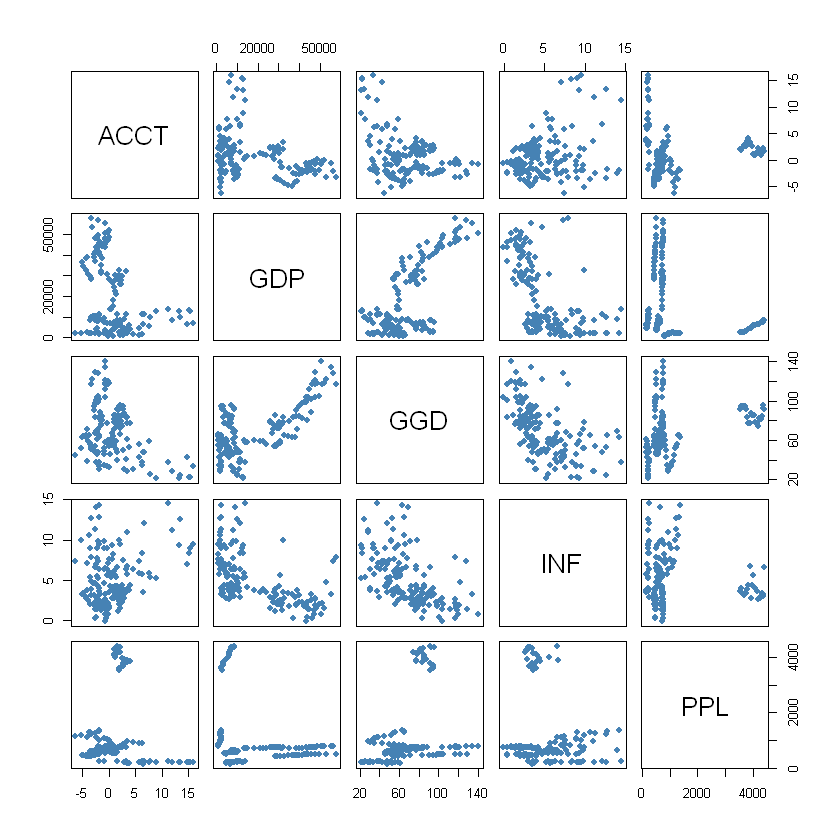

In [52]:
#df_select <- df_select[ , c(3:7)]
#plot(df_select, pch=20, cex=1.5, col='steelblue')

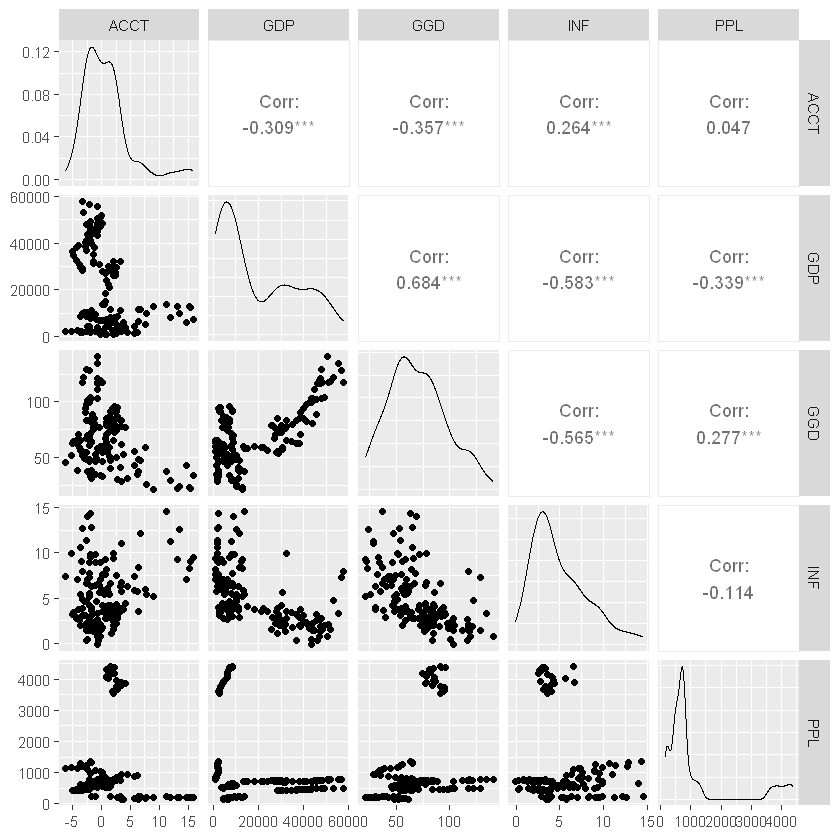

In [53]:
library(GGally)
ggpairs(df_select)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them."
Warning message:
"Removed 23 rows containing missing values (`geom_point()`)."


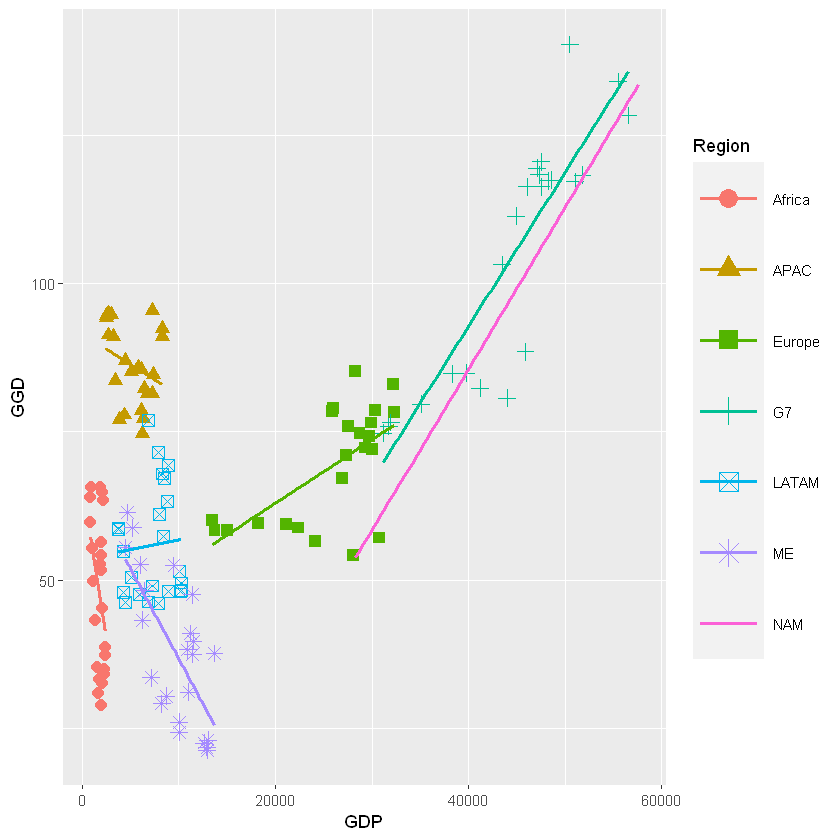

In [108]:
#scatterplot(GGD ~ GDP | Region, data=df_select)

ggplot(df_select, aes(x=GDP, y=GGD, color=Region, shape=Region)) +
  geom_point(size=3) +
  geom_smooth(method="lm", se=FALSE) +
  theme(legend.key.size = unit(1.5, "cm")) +
  guides(color = guide_legend(override.aes = list(size=5)))

In [121]:
#red, orange, yellow, green, blue, indigo, and violet.

# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)

variables <- c("GDP", "INF", "PPL", "ACCT")
variables_xlab <- c("Gross Domestic Product", 
                    "Inflation)", 
                    "Population",
                    "Current Account Balance",
                    "General Government Gross Debt")

variables_title <- c("General Government Gross Debt vs Gross Domestic Product",
                     "General Government Gross Debt vs Inflation",
                     "General Government Gross Debt vs Populaton",
                     "General Government Gross Debt vs Current Account Balance")

filename_title <- c("GGD vs GDP",
                     "GGD vs INF",
                     "GGD vs PPL",
                     "GGD vs ACCT")

# Initialize an empty list to store the plots
plot_list <- list()

# Use a loop to create a plot for each variable
for (i in seq_along(variables)) {
  p_scatter <- ggplot(df_select, aes_string(x=variables[i], y="GGD", color="Region", shape="Region")) +
    geom_point(size=3) +
    geom_smooth(method="lm", se=FALSE) +
    scale_shape_manual(values=c(16, 17,18,8,9,21,10)) +
    scale_color_manual(values=c("blue", "red", "green", "violet", "orange", "#4B0082", "yellow")) +
    theme(legend.key.size = unit(1.5, "cm")) +
    guides(color = guide_legend(override.aes = list(size=5)))+    
    theme_ipsum() +
    theme(
        legend.position="right",
        legend.title = element_text(face = "bold"),  # Bold the legend title
        legend.text = element_text(face = "bold"),  # Bold the legend text
        plot.title = element_text(hjust = 0, vjust=-3, size =10, face = "bold.italic"),
        axis.title.x = element_text(hjust=0.5, vjust=-7,color = "blue", size = 14, face = "bold"), 
        axis.title.y = element_text(hjust=0.5, vjust=5, color = "blue", size = 14, face = "bold"),
        axis.text = element_text(face = "bold"),
        plot.background = element_rect(fill = "white"), # Set background color to white
        panel.background = element_rect(fill = "white") # Set panel background color to white
    ) +    
    labs(fill = "Region + G7") +  # Customize the legend title
    ggtitle(variables_title[i]) +  # Use the title from variables_title vector
    xlab(variables_xlab[i])+
    ylab("General Gross Government Debt")  # Add y-axis label

      # Save the plot with file name as variable name
  ggsave(paste0(filename_title[i], "_scatterplot.png"), plot = p_scatter)
}

dev.off()
  

Saving 6.67 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'
Saving 6.67 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'
Saving 6.67 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'
Saving 6.67 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'


null device 
          1

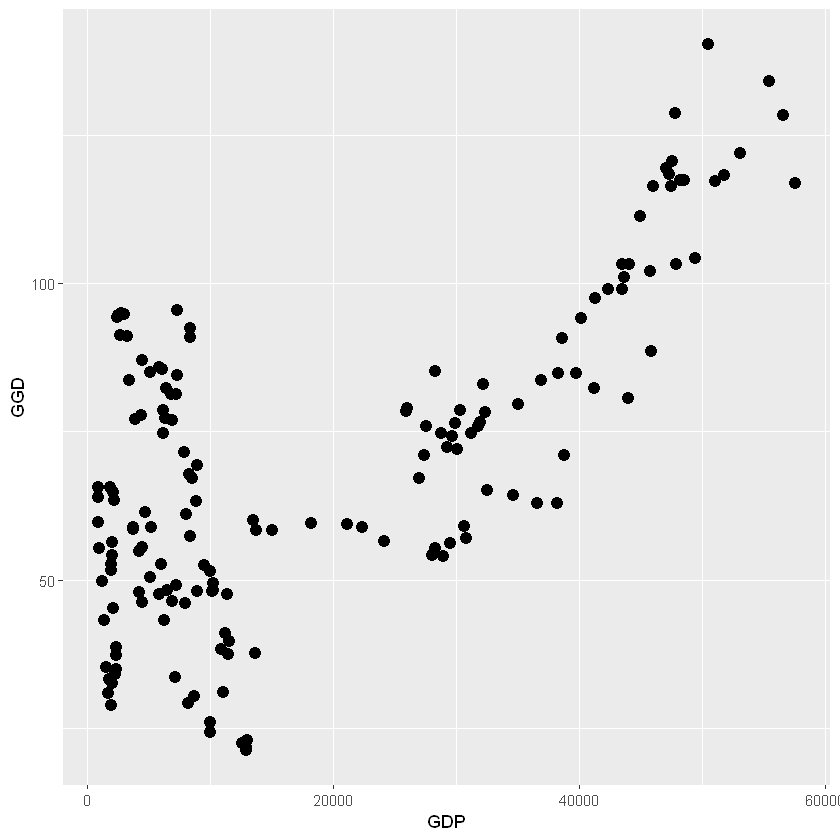

In [41]:
# library
#library(ggplot2)
 
# dataset: df_select

# basic scatterplot
library(paletteer)
ggplot(df_select, aes(x=GDP, y=GGD, color=Region)) + 
    geom_point(size = 3) +
    scale_color_paletteer_d("nord::halifax_harbor")

